In [3]:
import numpy as np 
import pandas as pd 

# Visualization Libraries 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn import datasets # Using built-in datasets 
from sklearn import metrics # Checking model accuracy 

# To plot the graph embedded in the notebook 
%matplotlib inline 

In [16]:
iris = datasets.load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [13]:
# load data into pandas dataframe 
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
# add target label into pandas dataframe 
iris_df['species'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
# replace target values with species names
iris_df['species'] = iris_df['species'].replace([0,1,2],['setosa','versicolor','virginica'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
# number of sample for each class of iris 
iris_df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

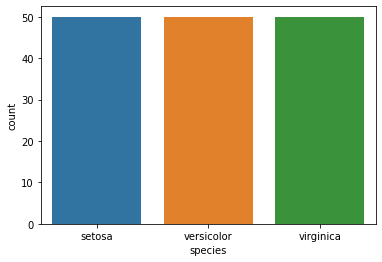

In [21]:
sns.countplot(x='species',data=iris_df)


<AxesSubplot:>

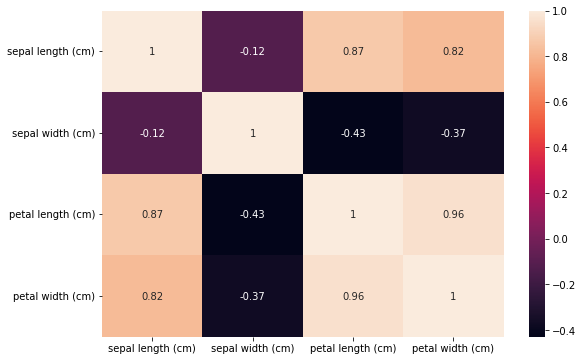

In [22]:
# calculate the correlation between variables
correlation_matrix = iris_df.corr().round(2)
plt.figure(figsize=(9,6))
sns.heatmap(data=correlation_matrix, annot=True)

In [27]:
# Remove redundate values 
# Return a array filled with zeros 
mask = np.zeros_like(correlation_matrix)
mask
# Return the indices from the upper-triangle of array 
mask[np.triu_indices_from(mask)] = True 
mask
#changing the fig size 
plt.figure(figsize = (9,6))

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

<AxesSubplot:>

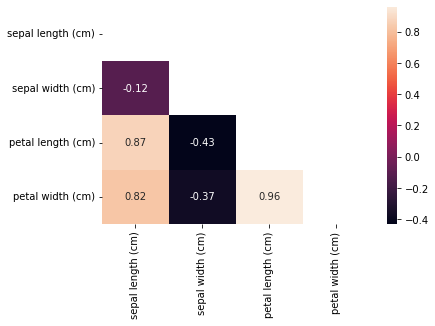

In [30]:
sns.heatmap(data=correlation_matrix, annot=True, mask=mask)

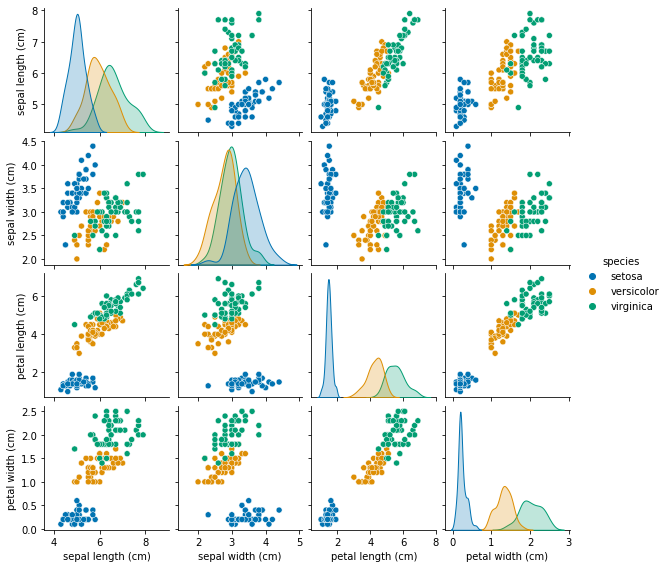

In [31]:
sns.pairplot(iris_df, hue='species',height=2,palette='colorblind')

<AxesSubplot:>

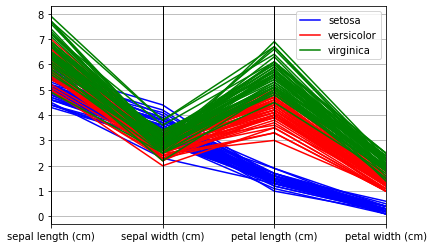

In [32]:
from pandas.plotting import parallel_coordinates 
parallel_coordinates(iris_df,'species',color=['blue','red','green'])

In [33]:
#create feture matrix and target value 
X = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
X
# Target variable
y = iris_df['species']
y


0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [34]:
# Split the dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 16)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (105, 4)
X_test shape:  (45, 4)
y_train shape:  (105,)
y_test shape:  (45,)


In [35]:
# Create Model: Support Vector Machine (SVM) 
from sklearn import svm
model_svm = svm.SVC() 
model_svm.fit(X_train, y_train)
y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")

# save the accuracy score
score = set()
score.add(('SVM', score_svm))


----------------------------------
The accuracy of the SVM is: 0.9556
----------------------------------


In [36]:
#Create Model: Decision Tree
# importing the necessary package to use the classification algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")
# save the accuracy score
score.add(('DT', score_dt))


---------------------------------
The accuracy of the DT is: 0.9333
---------------------------------


In [37]:
# Create Model: K Nearest Neighbours (KNN) 
# ..................................................
# importing the necessary package to use the classification algorithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")
# save the accuracy score
score.add(('KNN', score_knn))


----------------------------------
The accuracy of the KNN is: 0.9556
----------------------------------


In [38]:
# Create Model: Logistic Regression

# importing the necessary package to use the classification algorithm
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) #train the model with the training dataset
y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
print("---------------------------------")
print('The accuracy of the LR is: {}'.format(score_lr))
print("---------------------------------")
# save the accuracy score
score.add(('LR', score_lr))


---------------------------------
The accuracy of the LR is: 0.9333
---------------------------------


In [39]:
# Create Model: Naive Bayes

# importing the necessary package to use the classification algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")
# save the accuracy score
score.add(('NB', score_nb))

---------------------------------
The accuracy of the NB is: 0.9111
---------------------------------


In [40]:
print("The accuracy scores of different Models:")
print("----------------------------------------")
for s in score:
 print(s)


The accuracy scores of different Models:
----------------------------------------
('SVM', 0.9556)
('NB', 0.9111)
('LR', 0.9333)
('DT', 0.9333)
('KNN', 0.9556)
